<img src="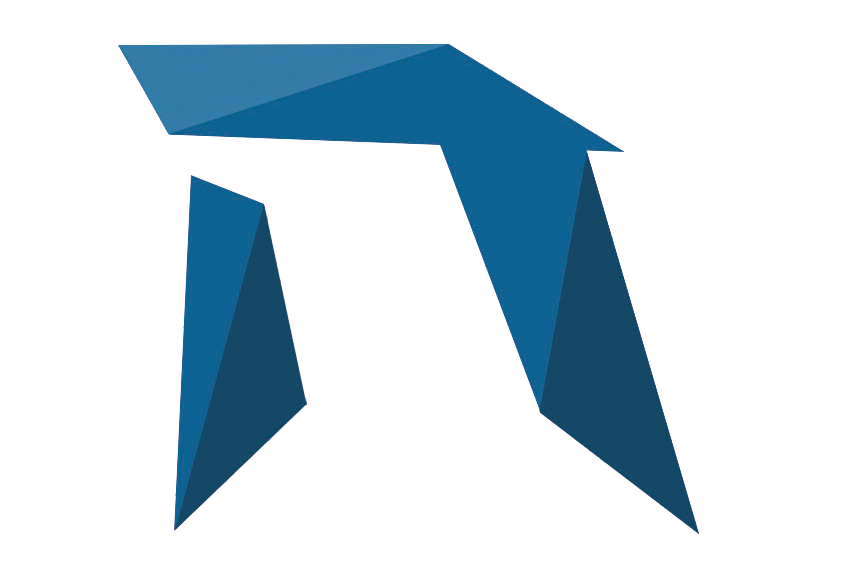
" style="width:100px;height:85px">



***
# HEICODERS ACADEMY
<b>Artificial Intelligence Track</b><br>
***
<b>Technical Assessment</b>
***

<div class="alert alert-block alert-info">
    <b>Name of Candidate:</b> Seokyung (Lucia) Kim
</div>

Instructions
---
- There are 3 parts to this technical assessment:
    - The first part assesses your familiarity with python syntax, data structures, and computational thinking
    - The second part assesses your thought process and implementation mastery in EDA and Feature Engineering
    - The third part assesses your understanding of model training and evaluation processes in Machine Learning
- You have 7 days to work on this assessment. All the best!

Part 1 - Computational Thinking
--

<br>
<div class="alert alert-block alert-warning">
URA is identifying areas in Sengkang to build covered walkways for its first round of upgrading, and are looking for <b>uncovered clusters</b> in the area.<br>
    
A simple diagram of the Sengkang area is shown below, with `@` = covered walkways and `.` = uncovered areas.
</div> <br>   

<div style="text-align: center; font-size: 18px; font-family: monospace; line-height: 16px">
@@@..@<br>
...@@.<br>
@@@@@@<br>
.@@@@.<br>
..@@.@<br>
</div>

<div class="alert alert-block alert-warning">
An <b>uncovered cluster</b> is made up of any 1 or more uncovered area units that are adjacent, be it horizontally, vertically or diagonally. For instance, this diagram below is contains 1 uncovered cluster.
</div> <br>   
<div style="text-align: center; font-size: 18px; font-family: monospace; line-height: 16px">
@.@<br>
.@.<br>
@..<br>
</div>

<div class="alert alert-block alert-warning">
Based on this definition of uncovered clusters, our first diagram above contains 3 clusters.<br>
    
Write a program for URA to identify the number of distinct uncovered clusters given any diagram. Specifically, your program should read in the Sengkang diagram via an input text file, such as `part1-testcases/testcase-1.txt`, and print out the number of distinct clusters (a single integer) as output. 
    
Note:
    
- Your program should be able to take in between 3 to 40 rows and columns
- Please provide clear instructions on we can run your submitted program to read in the input file
- You can create as many cells as you need below (just provide comments to let us know which cell we should run)
</div> <br> 

<b>Sample Input File 1</b> - `part1-testcases/testcase-1.txt`

<div style="text-align: center; font-size: 18px; font-family: monospace; line-height: 16px">
@@@..@<br>
...@@.<br>
@@@@@@<br>
.@@@@.<br>
..@@.@<br>
</div>

<b>Sample Output 1</b>

<code>3</code>
***

<b>Sample Input File 2</b> - `part1-testcases/testcase-2.txt`

<div style="text-align: center; font-size: 18px; font-family: monospace; line-height: 16px">
@@@@@@@@@@....@@.@@..@@..@.@.@@@.@.<br>
@@..@@@@...@@@@@@.@@..@.@.@....@...<br>
@@....@.@.@@@.@...@...@@@..@@.@...@<br>
@@@.@@@@.@..@.......@@@..@.@.....@@<br>
@....@...@@.@@.@@@@.@..@@@@@@@..@@@<br>
@.@...@....@@@........@@@@..@@.@..@<br>
..@.@@@@@...@..@..@@@......@@@..@..<br>
@..@@@@.@@...@...@@@...@.@.@@@@...@<br>
@....@@@..@@..@.@@@.@@@@..@@.@@@@@@<br>
.@..@...@.....@...@@.@.@.@..@..@.@.<br>
@@@@@@.@@@@..@@@@.......@@..@.@.@..<br>
@.@.....@@@....@....@@.@..@@..@....<br>
..@....@.@.@@@.@@@..@@.@.@@@.@..@.@<br>
@@.@.......@.@.@@@..@@@.....@@.@@@@<br>
.@.@.@...@..@@@@@@.....@.@@...@...@<br>
...@.@...@@..@......@...@@@@@@@@..@<br>
@.@....@@@@.@.@..@...@@@@@@@@..@@@@<br>
@@@@@...@..@@@@.@@@@..@.@.@...@@..@<br>
@.@..@.@......@@@@@....@.@@@.@.@@.@<br>
@.@@@@.@.@...@..@@@..@@.@@.@@.@@.@.<br>
@.....@@@...@...@@..@@..........@@@<br>
@@@.@@@@..@...@@@.@.@@.@.@@@.....@@<br>
..@.@.@..@....@.@.@@.@@.@@..@.@@@.@<br>
@..@@@.@.@@..@@...@@..@.@@@@...@@..<br>
@@@.@..@...@@@@.@@@.@@..@.@@.@@@...<br>
.@@@..@.@.@...@@......@.@.@...@..@@<br>
@.@..@@..@@@@.@@..@@@@@@..@.@@..@@@<br>
.@...@...@..@@.@@@...@@..@@.@.@.@..<br>
@@@@..........@..@@..@.@.@@@..@....<br>
.@@@@@@.@.@..@..@@@@..@@@@@@@@..@.@<br>
</div>

<b>Sample Output 2</b>

<code>2</code>

<i>Explanation: The dot on the bottom left corner is its own uncovered cluster (Cluster 1). The rest of the dots on this diagram are fully connected either horizontally, vertically or diagonally, hence they collectively form a cluster (Cluster 2).</i>


In [210]:

def identify_uncovered_clusters(clusters):

    result = 0
    row = len(clusters)
    col = len(clusters[0])

    def identify(r, c):
        if r < 0 or r >= row or c < 0 or c >= col or clusters[r][c] == "@":
            return
        # Mark as visited
        clusters[r][c] = "@"

        identify(r-1, c-1)  # top-left diagonal
        identify(r-1, c)    # top
        identify(r-1, c+1)  # top-right diagonal
        identify(r, c-1)    # left
        identify(r, c+1)    # right
        identify(r+1, c-1)  # bottom-left diagonal
        identify(r+1, c)    # bottom
        identify(r+1, c+1)  # bottom-right diagonal

    for r in range(row):
        for c in range(col):
            cluster = clusters[r][c]
            if cluster == ".":
                identify(r, c)  
                result += 1

    return result


In [211]:
def test_with_file(filename):
    # Read the file and create the grid (2D list)
    with open(filename, 'r') as file:
        clusters = [list(line.strip()) for line in file.readlines()]
    # Call the identify_uncovered_clusters function
    result = identify_uncovered_clusters(clusters)
    
    # Print the result (number of clusters)
    print(result)

In [212]:
test_with_file('part1-testcases/testcase-1.txt')
test_with_file('part1-testcases/testcase-2.txt')

3
2


Scenario for Parts 2 & 3
---
You are a data scientist working at Wanderlust, a reputable hotel booking company with a website that provides price discovery and booking services for hotel destinations worldwide. The gross revenue from bookings on Wanderlust amounted to more than 99 billion in 2018, and more than 2 million leisure and business travellers alike visit Wanderlust everyday in search of the best hotel deals.

In a bid to further improve sales, your boss is interested to know <b>if there's a way to predict the hotel booking outcome</b> of a customer based on their search behaviour, so that hotel recommendations can be tailored to customers that are unlikely to complete their booking.

You are provided a downsampled dataset, <code>data/hotel_bookings_train_dataset.csv</code>, which logs hotel search traffic from February 2013. The features in each row contains information on a customer's search behaviour, such as the check in/out dates and the number of adults entered during the hotel room search. This dataset is adapted from a [Kaggle](https://www.kaggle.com/c/expedia-hotel-recommendations/data) dataset, and more information on each of the 20 columns is as follows:

| col name | definition | datatype | example |
| -------- | ---------- | -------- | ------- |
| date_time | Timestamp | string | 2014-02-13 18:46:24 |
| site_name | ID of the Expedia point of sale (i.e. Expedia.com, Expedia.co.uk, Expedia.co.jp, ...) | int | 24 |
| posa_continent | ID of continent associated with site_name | int | 2 |
| user_location_country | The ID of the country the customer is located | int | 4 |
| user_location_region | The ID of the region the customer is located | int | 2 |
| is_mobile | 1 when a user connected from a mobile device, 0 otherwise | tinyint | 1 |
| is_package | 1 if the click/booking was generated as a part of a package (i.e. combined with a flight), 0 otherwise | int | 0 |
| channel | ID of a marketing channel | int | 2 |
| srch_ci | Checkin date | string | 2013-03-02 |
| srch_co | Checkout date | string | 2013-06-02 |
| srch_adults_cnt | The number of adults specified in the hotel room | int | 1 |
| srch_children_cnt | The number of (extra occupancy) children specified in the hotel room | int | 0 |
| srch_rm_cnt | The number of hotel rooms specified in the search | int | 2 |
| srch_destination_type_id | Type of destination | int | 2 |
| is_booking | 1 if a booking, 0 if a click | tinyint | 1 |
| cnt | Numer of similar events in the context of the same user session | bigint | 1 |
| hotel_continent | Hotel continent | int | 2 |
| hotel_country | Hotel country | int | 20 |
| hotel_market | Hotel market | int | 201 |
| hotel_cluster | ID of a hotel cluster | int | 60 |

Part 2 - Data Exploration and Feature Engineering 
--

<br>
<div class="alert alert-block alert-warning">
    
Walk us through how you would perform exploratory data analysis (EDA) and feature engineering on the hotel bookings dataset - <code>data/hotel_bookings_train_dataset.csv</code> (**100,417** observations.)
    
You should provide:

- Code implementation for feature engineering steps, if any
- Point out insights from your EDA process, i.e. do not provide visualisations without discussing the insights that can be derived from each plot
- Be sure to explain your thought process via comments or markdown cells! We're not looking at code regurgitation, but a demonstrated mastery of how you'd approach an analytics problem and predictive task.
- Feel free to create as many cells as you need below.
    
</div>

### Setup

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
trainDf= pd.read_csv('./data/hotel_bookings_train_dataset.csv', delimiter=',')
testDf= pd.read_csv('./data/hotel_bookings_test_dataset.csv', delimiter=',')

### Overview

In [215]:
trainDf.shape

(100417, 20)

In [216]:
testDf.shape

(104550, 19)

This gave me insights about the size of the datasets.

In [217]:
trainDf

,date_time,site_name,posa_continent,user_location_country,user_location_region,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2013-02-01 00:01:17,24,2,3,47,0,0,5,2013-03-02,2013-03-05,1,0,1,6,0,4,2,50,675,5
1,2013-02-01 00:01:20,13,1,46,172,0,1,9,2013-05-26,2013-06-02,6,0,3,1,0,3,6,22,301,67
2,2013-02-01 00:01:25,23,1,1,443,0,1,1,2013-02-16,2013-02-18,2,0,1,1,0,1,6,204,27,25
3,2013-02-01 00:01:49,29,1,52,40,0,0,9,2013-07-13,2013-07-20,3,2,1,1,0,1,6,105,809,58
4,2013-02-01 00:01:51,24,2,230,395,0,0,0,2013-02-09,2013-02-15,1,0,1,4,0,1,4,8,121,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100412,2013-02-05 20:47:19,34,3,205,135,0,0,9,2013-03-08,2013-03-09,4,1,1,1,0,1,2,198,370,10
100413,2013-02-05 20:47:21,2,3,66,318,0,1,9,2013-04-05,2013-04-14,4,2,2,1,0,1,4,8,110,65
100414,2013-02-05 20:47:24,2,3,66,442,0,0,9,2013-02-12,2013-02-13,1,1,2,6,1,1,2,50,366,28
100415,2013-02-05 20:47:28,2,3,130,759,0,0,9,2013-02-07,2013-02-09,1,0,1,6,0,2,2,50,1230,41


In [218]:
testDf

,date_time,site_name,posa_continent,user_location_country,user_location_region,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,3/1/2013 0:00,8,4,77,824,0,0,3,3/14/2013,3/15/2013,1,0,1,1,1,3,104,76,26
1,3/1/2013 0:01,2,3,66,174,0,1,7,3/31/2013,4/5/2013,2,0,1,1,1,2,50,212,94
2,3/1/2013 0:01,2,3,6,492,0,0,9,3/28/2013,4/3/2013,2,1,1,1,1,6,70,19,49
3,3/1/2013 0:01,37,1,69,784,1,1,1,4/5/2013,4/8/2013,2,1,1,1,1,6,105,35,22
4,3/1/2013 0:01,8,4,77,824,0,0,3,3/14/2013,3/15/2013,1,1,1,1,1,3,104,76,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104545,3/4/2013 12:08,11,3,205,385,0,1,1,4/11/2013,4/20/2013,2,0,1,1,3,6,204,27,25
104546,3/4/2013 12:08,2,3,66,174,0,0,1,3/12/2013,3/13/2013,1,0,1,1,1,2,50,744,18
104547,3/4/2013 12:08,2,3,66,348,0,0,9,3/27/2013,3/29/2013,2,0,2,1,1,3,48,153,97
104548,3/4/2013 12:08,2,3,181,238,0,0,9,3/7/2013,3/9/2013,2,0,1,1,1,4,131,167,62


This gave me insights about how the data looks like regardless of the example values from the column description. Of couse, it shows test dataframe doesn't have is_booking column where we have to predict with the train data set.

### Checking some missing values

In [219]:
trainDf.isna().sum()


date_time                     0
site_name                     0
posa_continent                0
user_location_country         0
user_location_region          0
is_mobile                     0
is_package                    0
channel                       0
srch_ci                     417
srch_co                     417
srch_adults_cnt               0
srch_children_cnt             0
srch_rm_cnt                   0
srch_destination_type_id      0
is_booking                    0
cnt                           0
hotel_continent               0
hotel_country                 0
hotel_market                  0
hotel_cluster                 0
dtype: int64

In [220]:
testDf.isna().sum()


date_time                     0
site_name                     0
posa_continent                0
user_location_country         0
user_location_region          0
is_mobile                     0
is_package                    0
channel                       0
srch_ci                     445
srch_co                     445
srch_adults_cnt               0
srch_children_cnt             0
srch_rm_cnt                   0
srch_destination_type_id      0
cnt                           0
hotel_continent               0
hotel_country                 0
hotel_market                  0
hotel_cluster                 0
dtype: int64

It seems like srch_ci and srch_co columns have lots of null values in both train and test datasets. They are check in and out dates, indicating some users try searching without the information. But compared to the size of the datasets, it's a very little amount of null values - not significant.

### Summary info about the datasets

In [221]:
trainDf.describe()

,site_name,posa_continent,user_location_country,user_location_region,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,100417.000000,100417.000000,100417.000000,100417.000000,100417.000000,100417.000000,100417.000000,100417.000000,100417.000000,100417.000000,100417.000000,100417.000000,100417.000000,100417.000000,100417.000000,100417.000000,100417.000000
mean,14.139040,2.509296,91.630839,327.329825,0.115379,0.383989,5.986188,1.965902,0.378472,1.099874,2.483783,0.124839,1.707619,3.319488,85.528626,577.414133,49.516905
std,13.117602,0.875504,67.793106,234.101754,0.319480,0.486358,3.744249,0.842118,0.715404,0.416930,2.101515,0.330538,1.538237,1.670340,59.079167,525.817774,29.093629
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,66.000000,155.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,50.000000,126.000000,25.000000
50%,11.000000,3.000000,66.000000,329.000000,0.000000,0.000000,9.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,3.000000,50.000000,406.000000,50.000000
75%,24.000000,3.000000,133.000000,411.000000,0.000000,1.000000,9.000000,2.000000,1.000000,1.000000,5.000000,0.000000,2.000000,4.000000,126.000000,701.000000,73.000000
max,40.000000,4.000000,239.000000,1021.000000,1.000000,1.000000,9.000000,9.000000,9.000000,8.000000,8.000000,1.000000,42.000000,6.000000,212.000000,2117.000000,99.000000


In [222]:
testDf.describe()

,site_name,posa_continent,user_location_country,user_location_region,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,104550.000000,104550.000000,104550.000000,104550.000000,104550.000000,104550.000000,104550.000000,104550.000000,104550.000000,104550.000000,104550.000000,104550.000000,104550.000000,104550.000000,104550.000000,104550.000000
mean,9.967451,2.698393,87.134950,319.459206,0.128905,0.231784,6.128953,1.995074,0.441234,1.106523,2.721569,1.773668,3.215524,80.407174,585.367078,49.805729
std,12.135234,0.732944,59.943202,210.987473,0.335096,0.421974,3.703847,0.886755,0.770319,0.418794,2.181991,1.504584,1.655521,55.305278,504.321487,29.223493
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,66.000000,174.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,2.000000,50.000000,155.000000,25.000000
50%,2.000000,3.000000,66.000000,318.000000,0.000000,0.000000,9.000000,2.000000,0.000000,1.000000,1.000000,1.000000,2.000000,50.000000,552.000000,49.000000
75%,13.000000,3.000000,75.000000,395.000000,0.000000,0.000000,9.000000,2.000000,1.000000,1.000000,5.000000,2.000000,4.000000,105.000000,701.000000,74.000000
max,40.000000,4.000000,239.000000,1021.000000,1.000000,1.000000,9.000000,9.000000,9.000000,8.000000,8.000000,45.000000,6.000000,212.000000,2117.000000,99.000000


This insights are about numeric columns of the datasets. This helps me to understand the range of the values. 

- most of them are id so I just can check the range of the ID. 
- for the binary columns such as is_mobile, is_package, is_booking, I checked if there's any random values other than 1 or 0, with a focus on min/max values. 
- for the rest like srch_adults_cnt, srch_children_cnt, srch_rm_cnt, cnt, I focused on them the most to see if there's any unreasonable values for hotel room information, with a focus on min/mas values AND the mean values of them. for example 8 or 9 for the adults/childeren/room counts is not too common, considering the mean values are around 1-2 but the number itself is not too unreasonable for some big group of visitors.

### DateTime column Conversion

In [223]:
# Convert 'date_time' to datetime format
trainDf['date_time'] = pd.to_datetime(trainDf['date_time'], errors='coerce')
testDf['date_time'] = pd.to_datetime(testDf['date_time'], errors='coerce')

# Extract useful time-related features
trainDf['year'] = trainDf['date_time'].dt.year
trainDf['month'] = trainDf['date_time'].dt.month
trainDf['day_of_week'] = trainDf['date_time'].dt.dayofweek
trainDf['hour'] = trainDf['date_time'].dt.hour

testDf['year'] = testDf['date_time'].dt.year
testDf['month'] = testDf['date_time'].dt.month
testDf['day_of_week'] = testDf['date_time'].dt.dayofweek
testDf['hour'] = testDf['date_time'].dt.hour

# Display the first few rows to verify the changes
trainDf[['date_time', 'year', 'month', 'day_of_week', 'hour']].head()

,date_time,year,month,day_of_week,hour
0,2013-02-01 00:01:17,2013,2,4,0
1,2013-02-01 00:01:20,2013,2,4,0
2,2013-02-01 00:01:25,2013,2,4,0
3,2013-02-01 00:01:49,2013,2,4,0
4,2013-02-01 00:01:51,2013,2,4,0


In [224]:
trainDf = trainDf.drop(columns=['date_time'])
testDf = testDf.drop(columns=['date_time'])

In [225]:
trainDf[['year', 'month', 'day_of_week', 'hour']].describe()


,year,month,day_of_week,hour
count,100417.0,100417.0,100417.000000,100417.000000
mean,2013.0,2.0,3.116534,13.733372
std,0.0,0.0,2.377434,5.511810
min,2013.0,2.0,0.000000,0.000000
25%,2013.0,2.0,1.000000,10.000000
50%,2013.0,2.0,4.000000,14.000000
75%,2013.0,2.0,5.000000,18.000000
max,2013.0,2.0,6.000000,23.000000


### Check in / out columns Conversion

In [226]:
# Step 1: Convert 'srch_ci' and 'srch_co' from string to datetime
trainDf['srch_ci'] = pd.to_datetime(trainDf['srch_ci'])
trainDf['srch_co'] = pd.to_datetime(trainDf['srch_co'])
testDf['srch_ci'] = pd.to_datetime(testDf['srch_ci'])
testDf['srch_co'] = pd.to_datetime(testDf['srch_co'])

# Step 2: Calculate the number of days of stay
trainDf['days_of_stay'] = (trainDf['srch_co'] - trainDf['srch_ci']).dt.days
testDf['days_of_stay'] = (testDf['srch_co'] - testDf['srch_ci']).dt.days

In [227]:
trainDf = trainDf.drop(columns=['srch_ci', 'srch_co'])
testDf = testDf.drop(columns=['srch_ci', 'srch_co'])

In [228]:
trainDf['days_of_stay'].describe()

count    100000.000000
mean          3.709560
std           3.246658
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max         366.000000
Name: days_of_stay, dtype: float64

After we converted the check in / out dates into the days of the stay, it shows that users tend to book/click for 3-5 days, whereas some users book/click for months.

#### Binary columns validation

Since the above information shows only min/max of the binary values. I want to check a bit more details in case something is out of range with a custom function.

In [229]:
# Columns requiring either 0 or 1 values
binary_columns = ['is_mobile', 'is_package', 'is_booking']

In [230]:
# Check each binary column for values other than 0 or 1
for column in binary_columns:
    invalid_values = trainDf[~trainDf[column].isin([0, 1])]
    if not invalid_values.empty:
        print(f"'{column}': contains INVALID values other than 0 or 1:")
        print(invalid_values[column])
    else:
        print(f"'{column}': ALL VALID.")

'is_mobile': ALL VALID.
'is_package': ALL VALID.
'is_booking': ALL VALID.


In [231]:
# Check each binary column for values other than 0 or 1
for column in binary_columns:
    if column != 'is_booking':
        # Check for invalid values (not 0 or 1) in the binary column
        invalid_values = testDf.loc[~testDf[column].isin([0, 1]), column]
        
        if not invalid_values.empty:
            print(f"'{column}': contains INVALID values other than 0 or 1.")
            print(f"Invalid values: {invalid_values.unique()}")  # Print unique invalid values
            print(f"Total invalid count: {len(invalid_values)}")  # Print count of invalid entries
        else:
            print(f"'{column}': ALL VALID.")


'is_mobile': ALL VALID.
'is_package': ALL VALID.


It seems like the binary values are all valid.

### Data Distribution

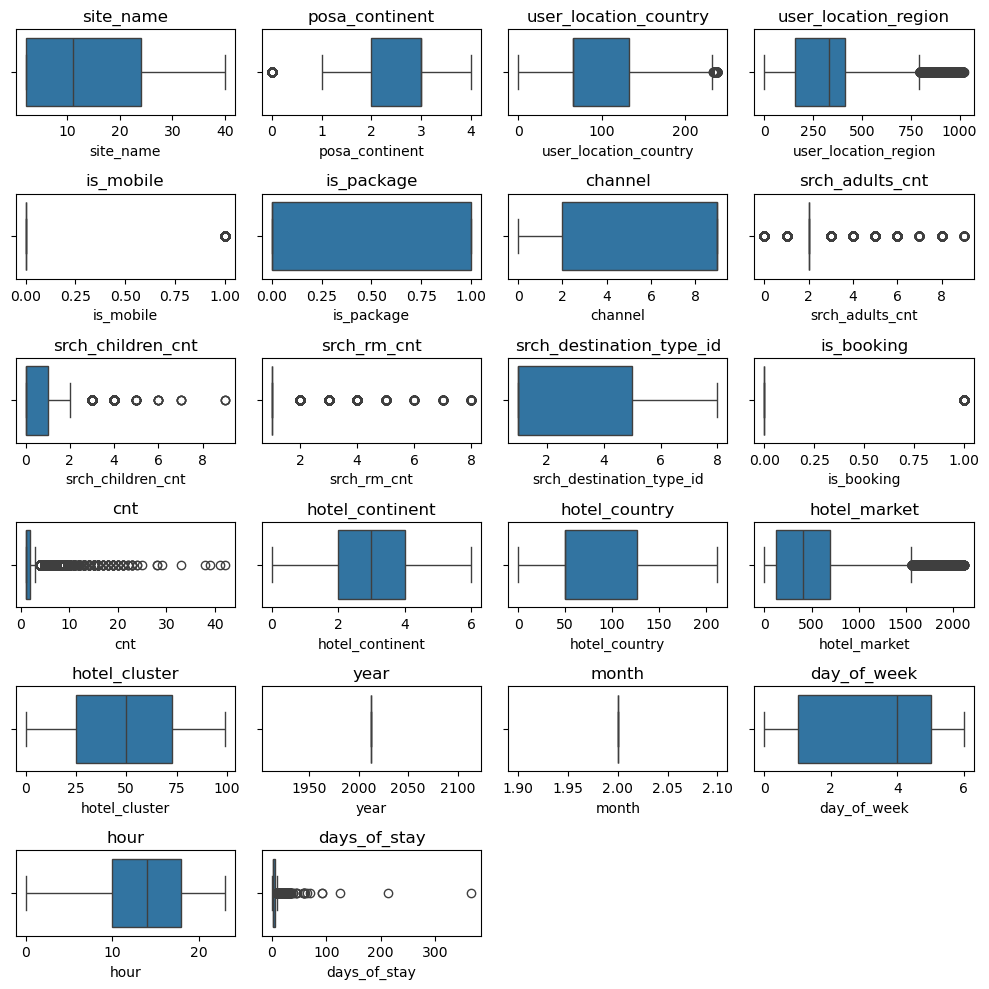

In [232]:
# Set up subplots dynamically based on the number of numeric columns
n_cols = 4
n_rows = (len(trainDf.columns) + n_cols - 1) // n_cols  # Calculate rows based on number of columns

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 10))

# Flatten the axes array
axes = axes.flatten()

# Plot each numeric column in the trainDf DataFrame
for i, col in enumerate(trainDf.columns):
    ax = axes[i]
    sns.boxplot(data=trainDf, x=col, ax=ax)
    ax.set_title(col)

# Turn off any unused axes
for j in range(len(trainDf.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


1. **`cnt` (Session Events)**
   - High values likely reflect heavy users or bots.

2. **`hotel_market`**
   - Rarely visited markets.

3. **`user_location_country` & `user_location_region`**
   - Uncommon countries/regions.

4. **`posa_continent` (Point of Sale Continent)**
   - Underrepresented continents.

5. **`srch_adults_cnt` (Adults)**
   - High adult counts in group bookings.

6. **`srch_children_cnt` (Children)**
   - Large family/group bookings.

7. **`srch_rm_cnt` (Rooms)**
   - Large group bookings.


In [233]:
# Filter columns that exist in both DataFrames and are valid for plotting
valid_columns = []
for col in trainDf.columns:
    if col in testDf.columns and (pd.api.types.is_numeric_dtype(trainDf[col]) or col in ['is_mobile', 'is_package', 'is_booking']):
        valid_columns.append(col)

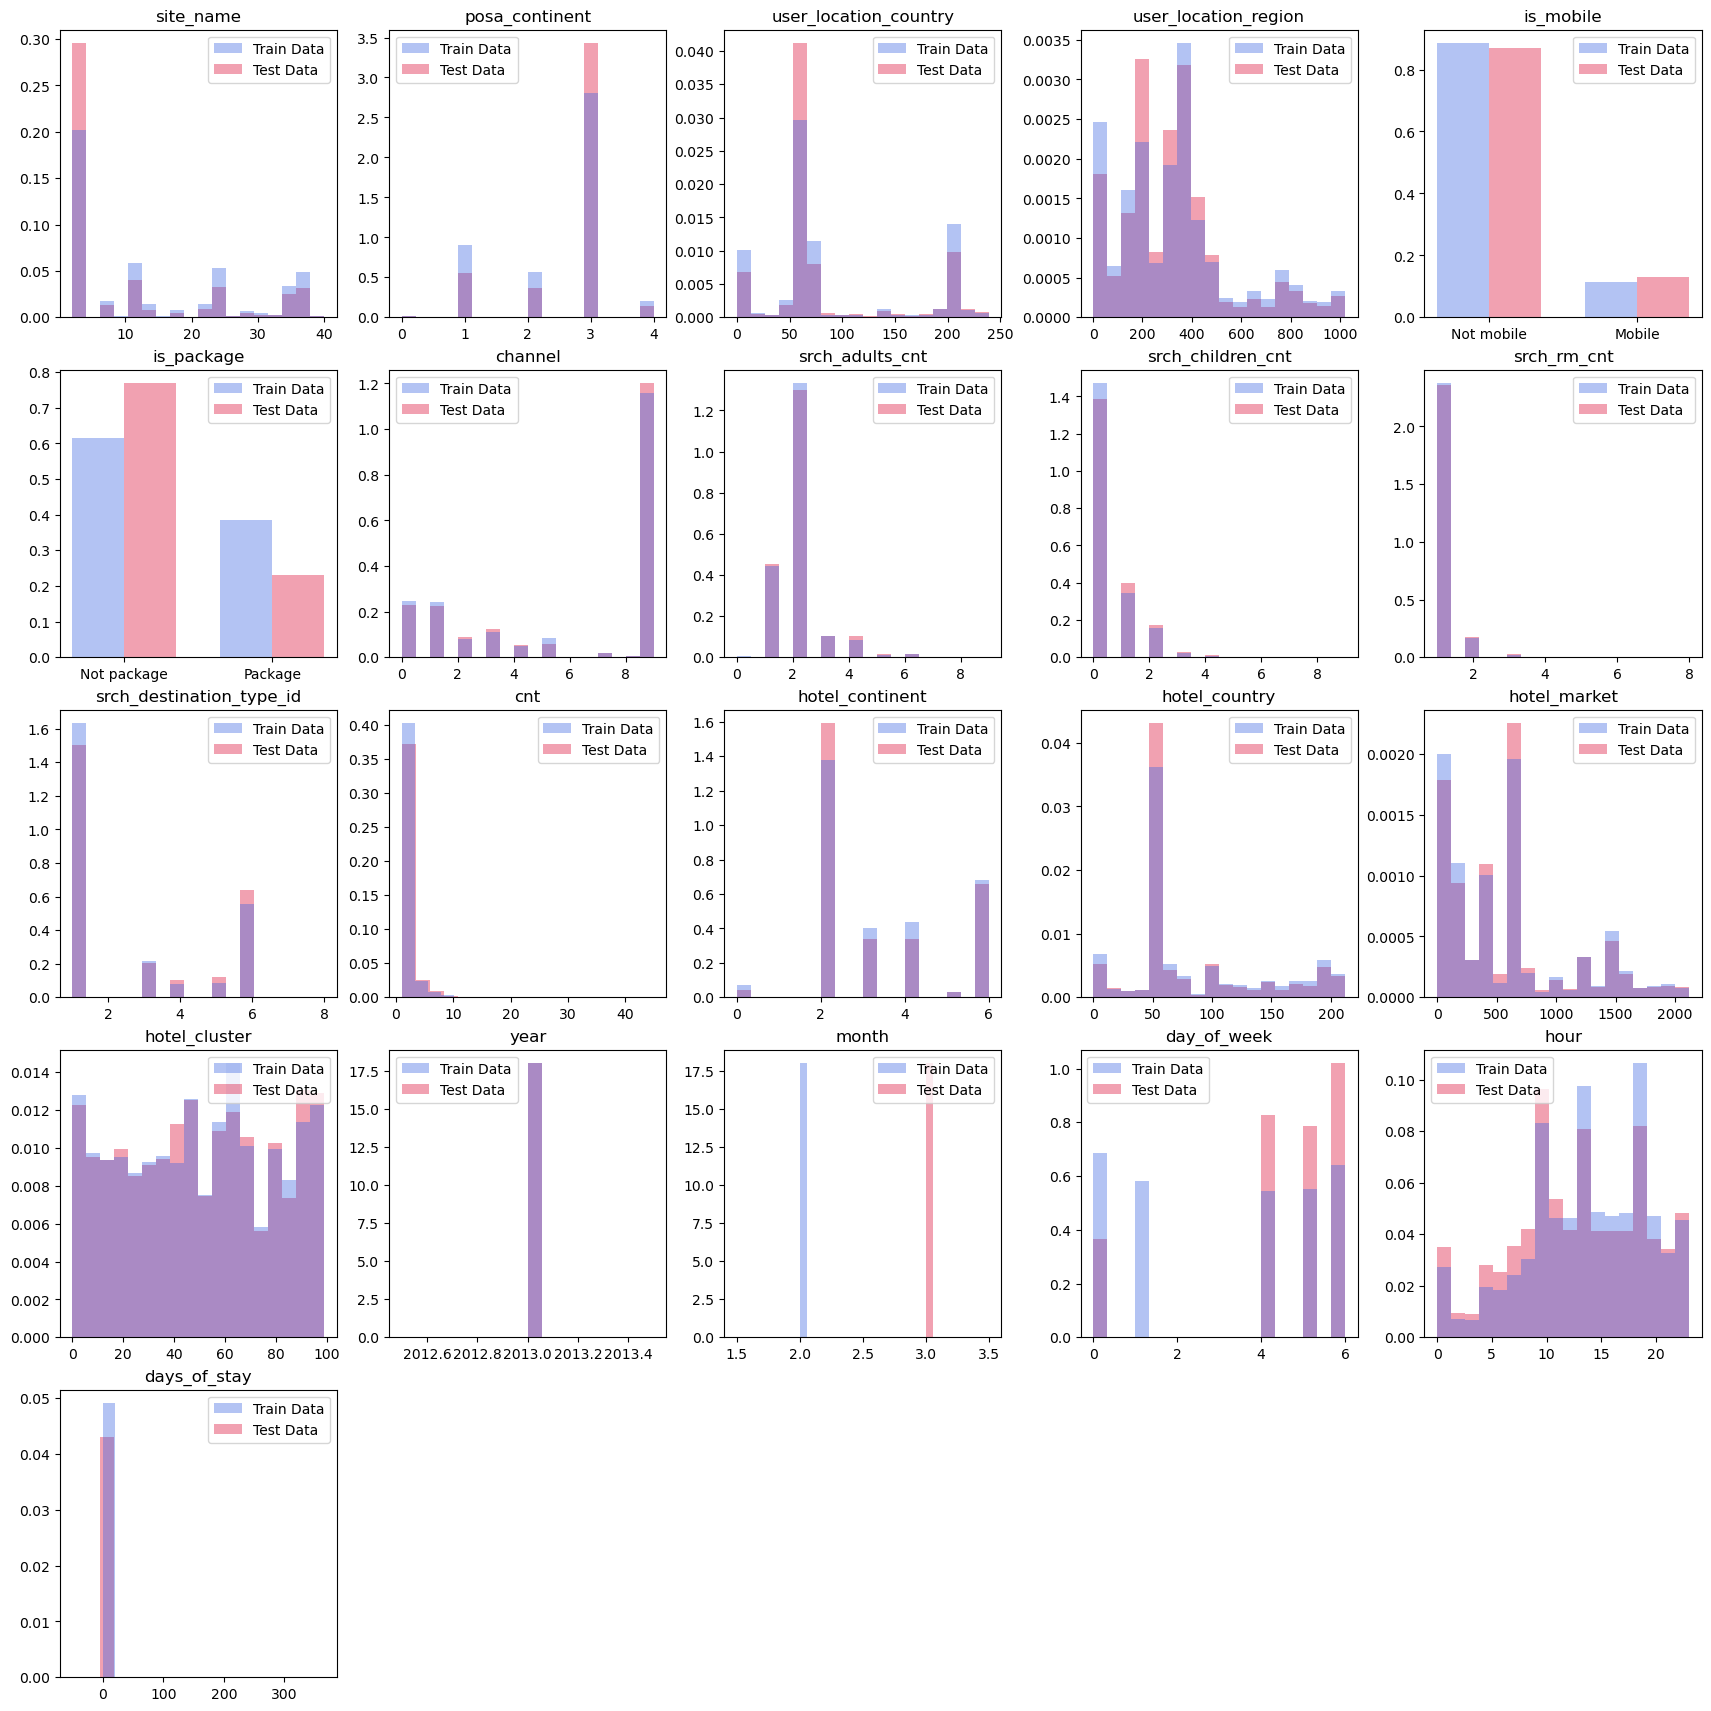

In [234]:
# Dynamically create subplots based on the number of valid columns
n_plots = len(valid_columns)
nrows = (n_plots // 4) + 1 if n_plots % 4 != 0 else n_plots // 4  # Adjust rows based on columns
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(17, 17), constrained_layout=True)

axes = axes.ravel()

# Labels for the plots
labels = {
    'is_mobile': ['Not mobile', 'Mobile'],
    'is_package': ['Not package', 'Package'],
    'is_booking': ['Click', 'Booking'],
    'site_name': ['Site ' + str(i) for i in range(trainDf['site_name'].nunique())],
    'posa_continent': ['Continent ' + str(i) for i in range(trainDf['posa_continent'].nunique())],
    'user_location_country': ['Country ' + str(i) for i in range(trainDf['user_location_country'].nunique())],
    'user_location_region': ['Region ' + str(i) for i in range(trainDf['user_location_region'].nunique())],
    'srch_adults_cnt': [str(i) + ' adults' for i in range(trainDf['srch_adults_cnt'].max() + 1)],
    'srch_children_cnt': [str(i) + ' children' for i in range(trainDf['srch_children_cnt'].max() + 1)],
    'srch_rm_cnt': [str(i) + ' rooms' for i in range(trainDf['srch_rm_cnt'].max() + 1)],
    'hotel_continent': ['Continent ' + str(i) for i in range(trainDf['hotel_continent'].nunique())],
    'hotel_country': ['Country ' + str(i) for i in range(trainDf['hotel_country'].nunique())],
    'hotel_market': ['Market ' + str(i) for i in range(trainDf['hotel_market'].nunique())],
    'hotel_cluster': ['Cluster ' + str(i) for i in range(trainDf['hotel_cluster'].nunique())],
    'days_of_stay': ['Days ' + str(i) for i in range(trainDf['days_of_stay'].nunique())]
}
     
# Loop over valid columns and plot
for i, col in enumerate(valid_columns):
    
    if col in labels:
        x_labels = labels[col]
    else:
        x_labels = ['0', '1']  # Default for binary columns
    
    # Plot binary columns
    if col in ['is_mobile', 'is_package', 'is_booking']:  
        train_counts = trainDf[col].value_counts(normalize=True)
        test_counts = testDf[col].value_counts(normalize=True)
        
        train_heights = [train_counts.get(0, 0), train_counts.get(1, 0)]
        test_heights = [test_counts.get(0, 0), test_counts.get(1, 0)]
        
        x = np.arange(len(x_labels))
        width = 0.35

        axes[i].bar(x - width/2, train_heights, width, label='Train Data', color='royalblue', alpha=0.4)
        axes[i].bar(x + width/2, test_heights, width, label='Test Data', color='crimson', alpha=0.4)
        
        axes[i].set_title(col)  # Set title for each subplot
        axes[i].set_xticks(x)
        axes[i].set_xticklabels(x_labels)
        axes[i].legend()  # Show legend
    
    # Plot histograms for numeric columns
    elif pd.api.types.is_numeric_dtype(trainDf[col]):
        train_data = trainDf[col].dropna()
        test_data = testDf[col].dropna()
        
        axes[i].hist(train_data, bins=min(len(train_data) // 10, 18),
                     color="royalblue", density=True, alpha=0.4, label="Train Data", zorder=1)
        axes[i].hist(test_data, bins=min(len(test_data) // 10, 18),
                     color="crimson", density=True, alpha=0.4, label="Test Data", zorder=0)
        axes[i].set_title(col)  # Set title for each subplot
        axes[i].legend()  # Show legend

# Hide any unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

<Axes: xlabel='is_booking', ylabel='count'>

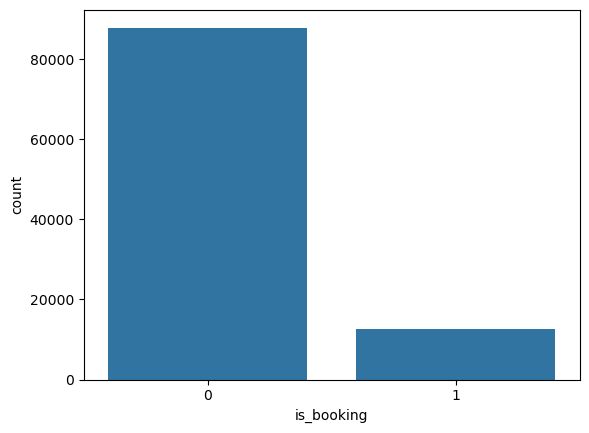

In [235]:
sns.countplot(x='is_booking', data=trainDf)

**The purple bar represents the overlapping regions between the blue (train data) and pink (test data) colors on the visualization.**

- **Overall Comparison**:
  - **Train vs. Test**: Both datasets exhibit **similar distribution trends**, indicating consistent patterns across data splits.

- **ID Columns**:
  - **User Location**:
    - **`site_name` & `posa_continent`**: One prominent site and continent (~20-30%) dominate user activity, suggesting a primary platform-continent link.
    - **`user_location_country` & `user_location_region`**: Users come from diverse regions, but a few countries account for the majority of bookings.
  - **Hotel Location**:
    - **`hotel_continent` & `hotel_country`**: Certain regions (Continent 2, Country 50) are particularly popular, likely reflecting well-known tourist destinations.

- **Binary Columns**:
  - **Device**: Majority of bookings/clickings are made on the web rather than mobile.
  - **Package Bookings/Clickings**: Non-package bookings/clickings are more common, suggesting packages have limited influence on user decisions.

- **Count Columns**:
  - **`srch_adults_cnt`, `srch_children_cnt`, `srch_rm_cnt`**: The bulk of searches involve typical group sizes (0-4 adults/children/rooms), with larger values (6-8) appearing as outliers.

- **Session Event Count (`cnt`)**: Most sessions involve 1-3 similar events, indicating a focused booking/clickings process.

## Correlations between every column

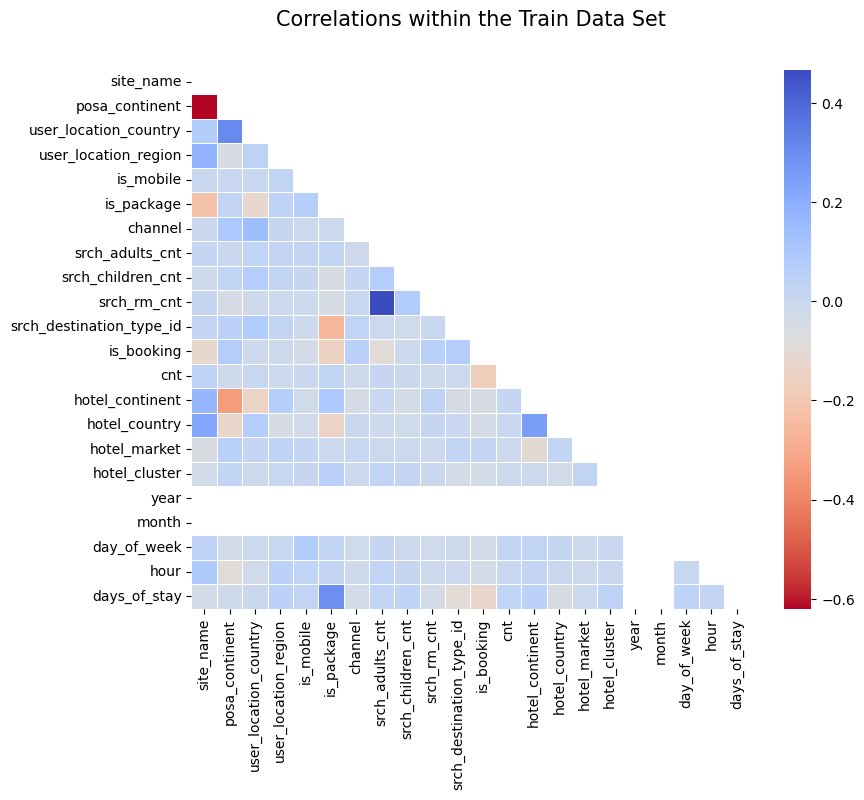

In [236]:
fig, ax = plt.subplots(figsize=(9, 7)) 

# Create the mask for the upper triangle
mask = np.triu(np.ones_like(trainDf.corr(), dtype=bool))

# Plot the heatmap
sns.heatmap(trainDf.corr(),
            mask=mask,
            cmap='coolwarm_r',
            linewidths=0.7,
            linecolor='white',
            ax=ax)

plt.title("Correlations within the Train Data Set", y=1.03, fontsize=15, pad=20)
plt.show()


- Strong relationships are observed between:
    - **User location and site data**: `user_location_country` with `posa_continent`, and `user_location_region` with `site_name`.
    - **Search and room details**: `srch_children_cnt` correlates with `srch_rm_cnt`, indicating that searches with children often involve multiple rooms.
    - **Hotel and site location**: `hotel_country` relates closely to `site_name`, and `hotel_continent` is linked to both `site_name` and `hotel_country`, suggesting specific regions dominate certain markets.
    - **Packages and stay duration**: There’s a notable link between `is_package` and `days_of_stay`, with package bookings tending to involve longer stays. 

### Correlations with 'is_booking' Column

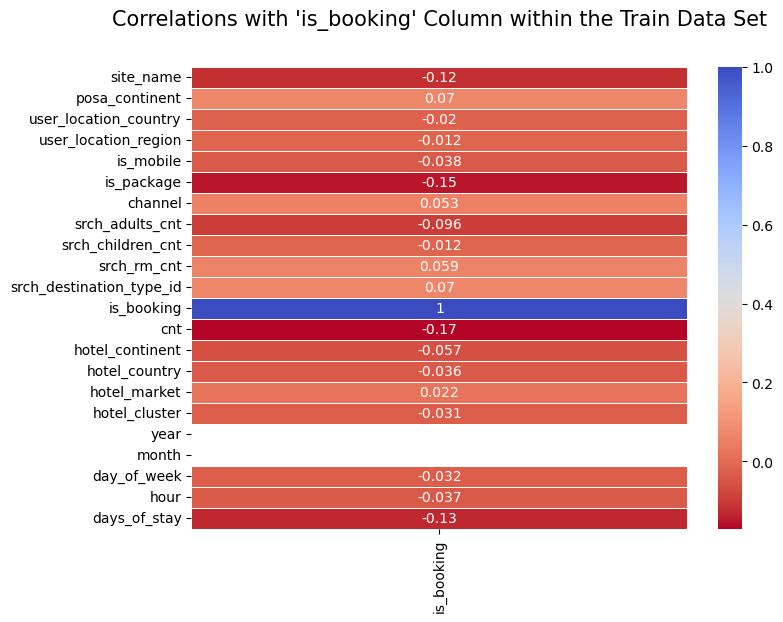

In [237]:
# Calculate the correlation of numeric columns with 'is_booking'
is_booking_correlation = trainDf.corr()['is_booking']

# Create a DataFrame for the heatmap with just the 'is_booking' correlations
is_booking_correlation_df = is_booking_correlation.to_frame()

fig, ax = plt.subplots(figsize=(8, 6))

# Create the heatmap for the correlations with 'is_booking'
sns.heatmap(is_booking_correlation_df,  
            cmap='coolwarm_r',
            annot=True, 
            linewidths=0.7,
            linecolor='white',
            ax=ax  
           )

plt.title("Correlations with 'is_booking' Column within the Train Data Set", y=1.03, fontsize=15, pad=20)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.yticks(rotation=0)   # Keep y-axis labels unchanged
plt.show()


The strongest correlation with **`is_booking`** is observed with **`srch_destination_type`** and **`posa_continent`**, each showing a correlation of **0.07**. This is followed by **`srch_rm_cnt`** at **0.059**, **`channel`** at **0.053**, and **`hotel_market`** at **0.022**. 

Conversely, the weakest correlations are found with **`cnt`** at **-0.17**, **`is_package`** at **-0.15**, **`days_of_stay`** at **-0.13**, and **`site_name`** at **-0.12**. 

### Group uncommon countries/regions/continents into "Other (-1)"
Simplifies categorical variables, focusing on meaningful groups without losing interpretability.

In [238]:
# Group rare values into a numeric value (e.g., -1 for 'Other')
def group_rare_values_numeric(df, column_name, threshold):
    counts = df[column_name].value_counts()
    df[column_name] = df[column_name].apply(lambda x: x if counts[x] >= threshold else -1)

# Set the thresholds
threshold = 0.01 * len(trainDf)

# Group for the training dataset
group_rare_values_numeric(trainDf, 'user_location_country', threshold)
group_rare_values_numeric(trainDf, 'user_location_region', threshold)
group_rare_values_numeric(trainDf, 'posa_continent', threshold)
group_rare_values_numeric(trainDf, 'hotel_market', threshold)

# Group for the test dataset
group_rare_values_numeric(testDf, 'user_location_country', threshold)
group_rare_values_numeric(testDf, 'user_location_region', threshold)
group_rare_values_numeric(testDf, 'posa_continent', threshold)
group_rare_values_numeric(trainDf, 'hotel_market', threshold)

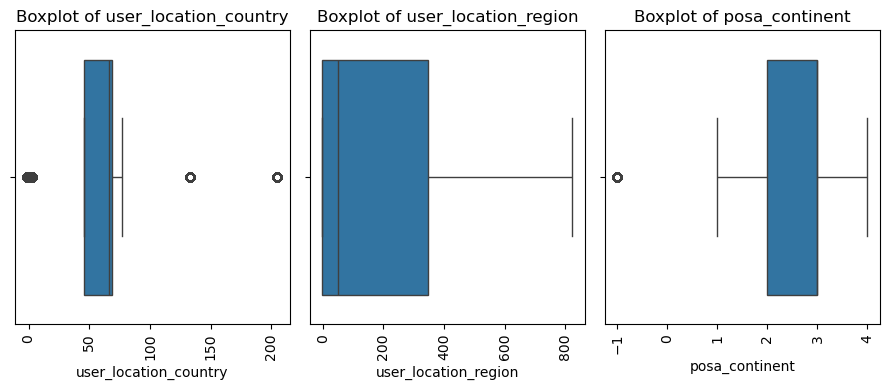

In [239]:
fig, axes = plt.subplots(1, 3, figsize=(9, 4))

# Plot a boxplot for 'user_location_country'
sns.boxplot(data=trainDf, x='user_location_country', ax=axes[0])
axes[0].set_title('Boxplot of user_location_country')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

# Plot a boxplot for 'user_location_region'
sns.boxplot(data=trainDf, x='user_location_region', ax=axes[1])
axes[1].set_title('Boxplot of user_location_region')
axes[1].tick_params(axis='x', rotation=90)

# Plot a boxplot for 'posa_continent'
sns.boxplot(data=trainDf, x='posa_continent', ax=axes[2])
axes[2].set_title('Boxplot of posa_continent')
axes[2].tick_params(axis='x', rotation=90)

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


### Treat high counts as outliers
Extreme values skew the distribution, especially for large groups or families.

In [240]:
# Capping high values of adults, children, and room counts based on the 99th percentile
for col in ['srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'cnt']:
    cap_value = trainDf[col].quantile(0.99)
    trainDf[col] = trainDf[col].apply(lambda x: cap_value if x > cap_value else x)

    cap_value = testDf[col].quantile(0.99)
    testDf[col] = testDf[col].apply(lambda x: cap_value if x > cap_value else x)

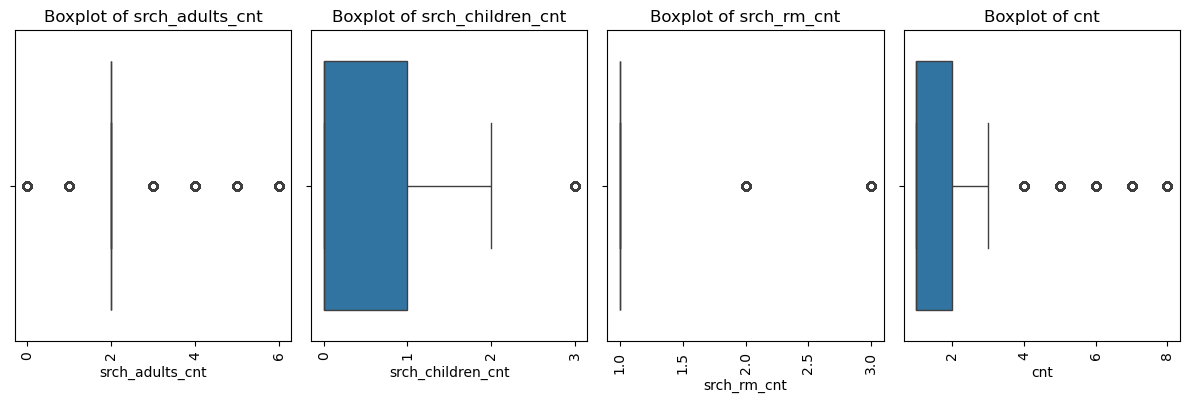

In [241]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

# Plot a boxplot for 'srch_adults_cnt'
sns.boxplot(data=trainDf, x='srch_adults_cnt', ax=axes[0])
axes[0].set_title('Boxplot of srch_adults_cnt')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

# Plot a boxplot for 'srch_children_cnt'
sns.boxplot(data=trainDf, x='srch_children_cnt', ax=axes[1])
axes[1].set_title('Boxplot of srch_children_cnt')
axes[1].tick_params(axis='x', rotation=90)

# Plot a boxplot for 'srch_rm_cnt'
sns.boxplot(data=trainDf, x='srch_rm_cnt', ax=axes[2])
axes[2].set_title('Boxplot of srch_rm_cnt')
axes[2].tick_params(axis='x', rotation=90)

# Plot a boxplot for 'cnt'
sns.boxplot(data=trainDf, x='cnt', ax=axes[3])
axes[3].set_title('Boxplot of cnt')
axes[3].tick_params(axis='x', rotation=90)

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


### Transform 'is_package' & 'days_of_stay' into an integrated column 

Given their limited relevance to 'is_booking' but high correlation between two, investigate interaction effects of them.

In [242]:
trainDf['package_stay_interaction'] = trainDf['is_package'] * trainDf['days_of_stay']
testDf['package_stay_interaction'] = testDf['is_package'] * testDf['days_of_stay']

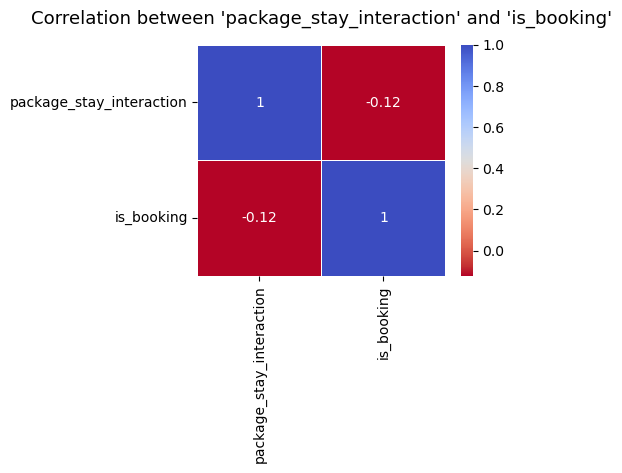

In [243]:
# Create a new DataFrame to focus on 'package_stay_interaction' and 'is_booking'
corr_df = trainDf[['package_stay_interaction', 'is_booking']].corr()

# Set up the plot
fig, ax = plt.subplots(figsize=(4, 3))  # Adjusted size for 2-column correlation heatmap

# Plot heatmap for the correlation between 'package_stay_interaction' and 'is_booking'
sns.heatmap(corr_df,  
            cmap='coolwarm_r',
            annot=True, 
            linewidths=0.7,
            linecolor='white',
            ax=ax  
           )

# Add title
plt.title("Correlation between 'package_stay_interaction' and 'is_booking'", y=1.03, fontsize=13, pad=10)

# Display the plot
plt.show()

It seems like even their combination won't affect much to 'is_booking' so I will decide to drop both columns.

In [244]:
trainDf = trainDf.drop(columns=['is_package', 'days_of_stay', 'package_stay_interaction'])
testDf = testDf.drop(columns=['is_package', 'days_of_stay', 'package_stay_interaction'])

### Interaction Features for Search Counts

Capture potential relationships between the number of children and the number of rooms in hotel bookings.

In [245]:
trainDf['children_room_interaction'] = trainDf['srch_children_cnt'] * trainDf['srch_rm_cnt']
testDf['children_room_interaction'] = testDf['srch_children_cnt'] * testDf['srch_rm_cnt']

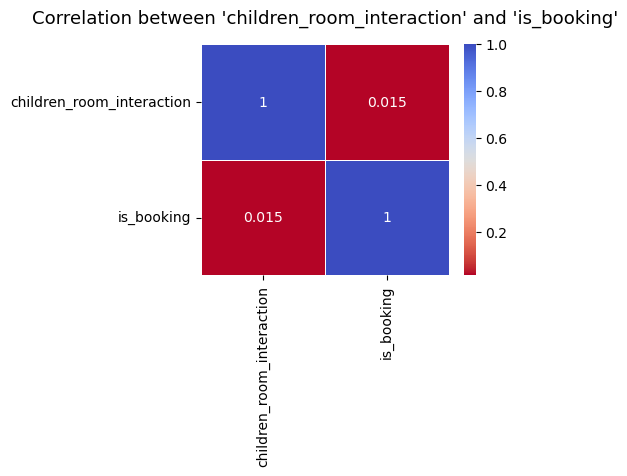

In [246]:
# Create a new DataFrame to focus on 'children_room_interaction' and 'is_booking'
corr_df = trainDf[['children_room_interaction', 'is_booking']].corr()

# Set up the plot
fig, ax = plt.subplots(figsize=(4, 3))  # Adjusted size for 2-column correlation heatmap

# Plot heatmap for the correlation between 'children_room_interaction' and 'is_booking'
sns.heatmap(corr_df,  
            cmap='coolwarm_r',
            annot=True, 
            linewidths=0.7,
            linecolor='white',
            ax=ax  
           )

# Add title
plt.title("Correlation between 'children_room_interaction' and 'is_booking'", y=1.03, fontsize=13, pad=10)

# Display the plot
plt.show()

### Drop weak correlated columns

In [247]:
trainDf = trainDf.drop(columns=['cnt'])
testDf = testDf.drop(columns=['cnt'])

### Standardization

Standardize numeric columns to ensure that the numeric values are on a similar scale, preventing features with larger magnitudes from dominating those with smaller ranges.

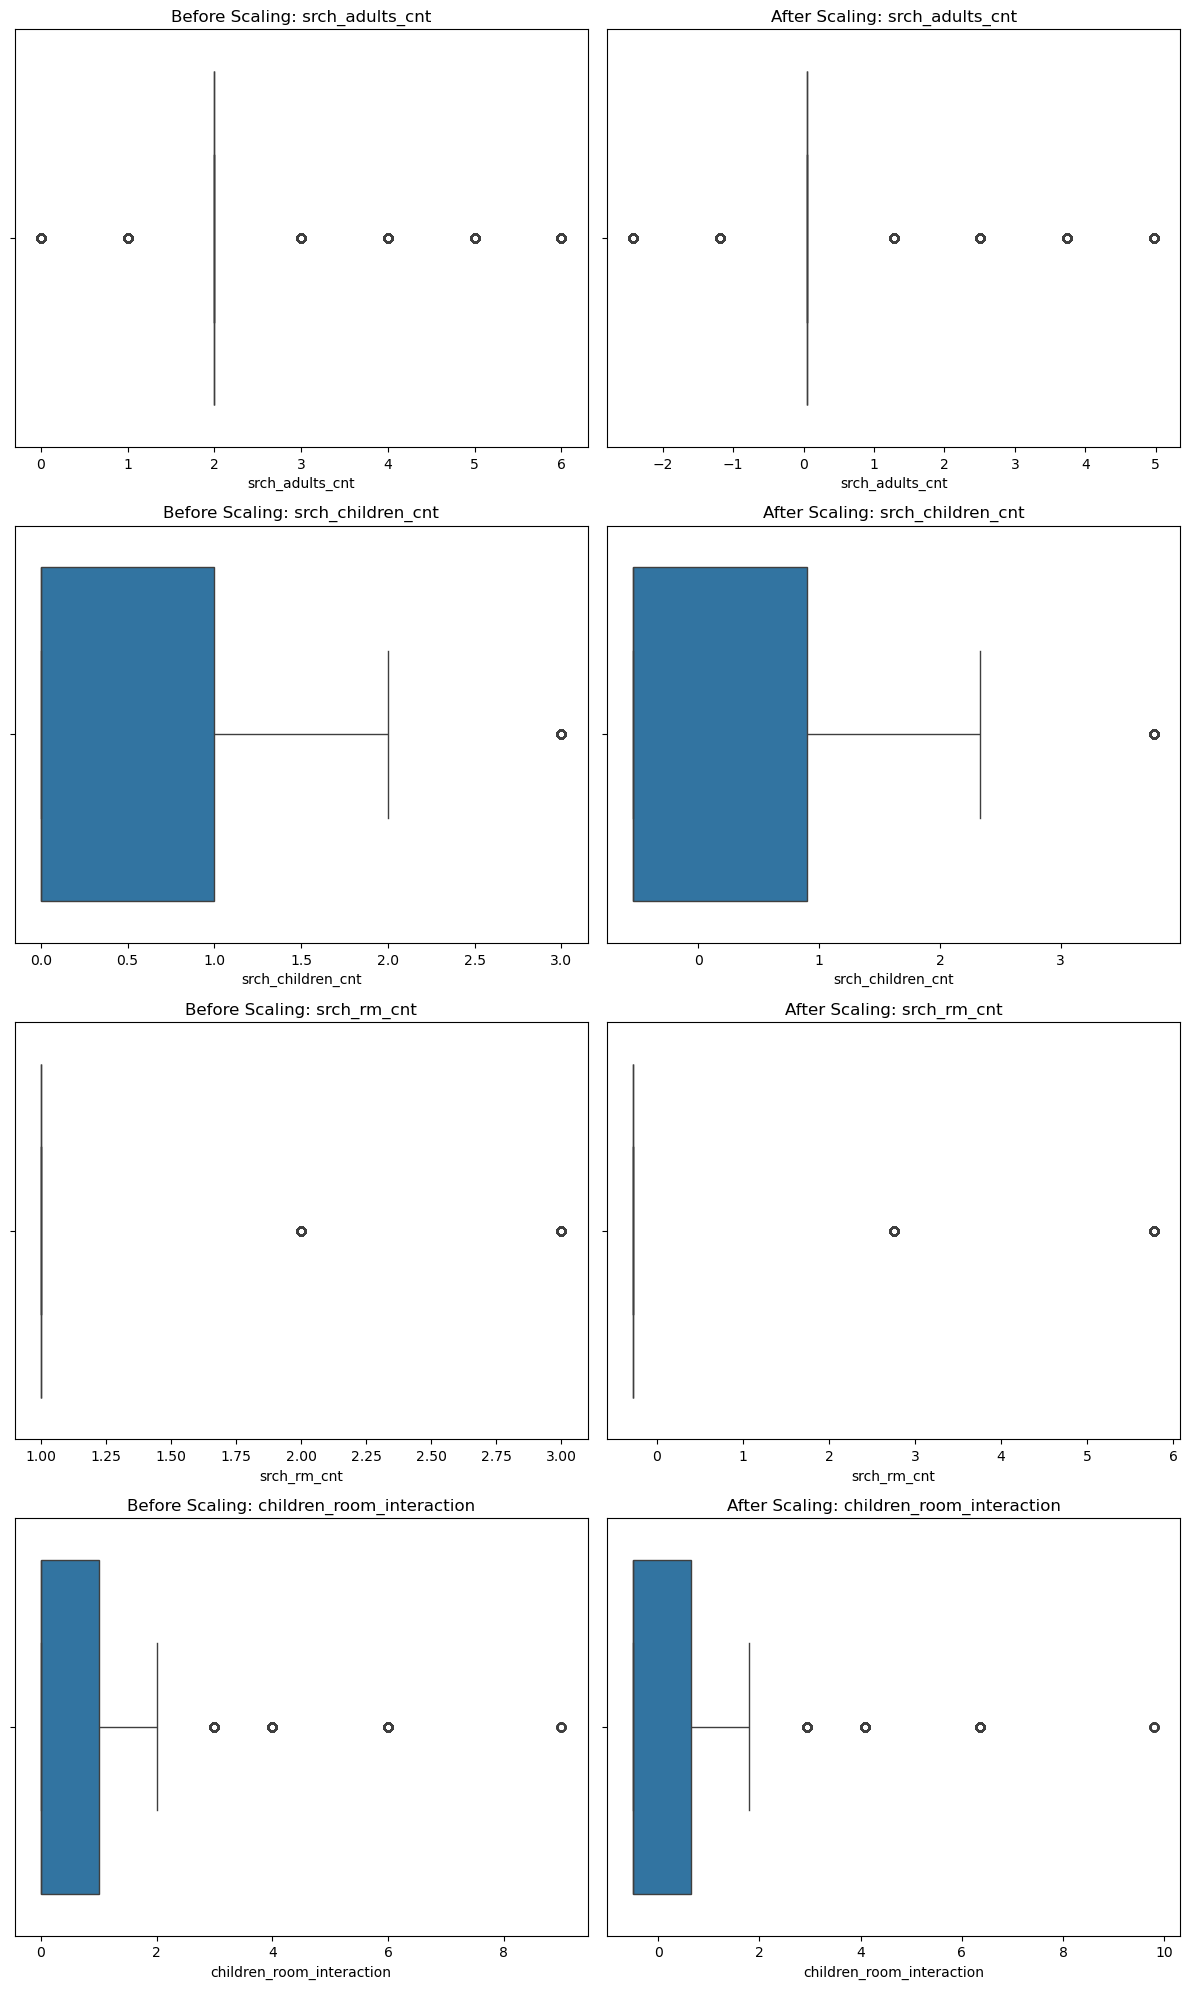

In [248]:
from sklearn.preprocessing import StandardScaler

# Standardize numeric columns to ensure even model performance
scaler = StandardScaler()
numeric_cols = ['srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'children_room_interaction']

# Save original data for plotting
original_trainDf = trainDf[numeric_cols].copy()

# Standardize the numeric columns in both train and test dataframes
trainDf[numeric_cols] = scaler.fit_transform(trainDf[numeric_cols])
testDf[numeric_cols] = scaler.transform(testDf[numeric_cols])

# Create a figure and axis for box plots
fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(12, 5 * len(numeric_cols)))

# Iterate through numeric columns and plot before and after scaling
for i, col in enumerate(numeric_cols):
    # Plot the original data before scaling
    sns.boxplot(data=original_trainDf, x=col, ax=axes[i, 0])
    axes[i, 0].set_title(f'Before Scaling: {col}')
    
    # Plot the scaled data
    sns.boxplot(data=trainDf, x=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'After Scaling: {col}')

plt.tight_layout()
plt.show()

### Handle Imbalanced Dataset
The target variable (is_booking) may exhibit class imbalance, where one class (is_booking = 0 is 80000+) significantly outnumbers the other (is_booking = 1 is 20000-). This can lead to biased model training, as the model may tend to favor the majority class.

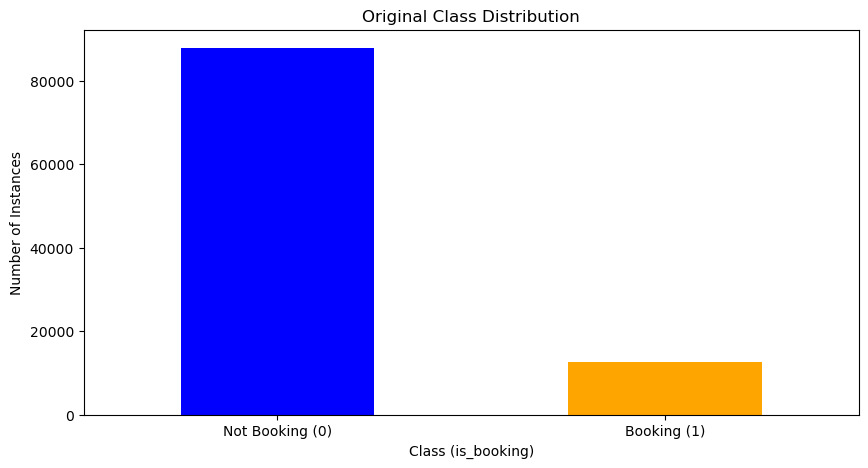

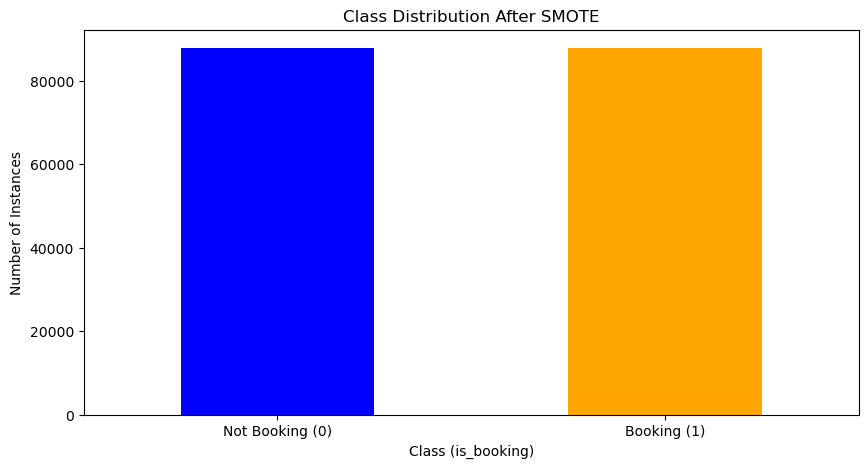

In [249]:
from imblearn.over_sampling import SMOTE

# Visualize the original class distribution
plt.figure(figsize=(10, 5))
trainDf['is_booking'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Original Class Distribution')
plt.xlabel('Class (is_booking)')
plt.ylabel('Number of Instances')
plt.xticks(ticks=[0, 1], labels=['Not Booking (0)', 'Booking (1)'], rotation=0)
plt.show()

# Separate features and target
y = trainDf['is_booking']
X = trainDf.drop(columns=['is_booking'])

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame for the resampled features
resampled_trainDf = pd.DataFrame(X_resampled, columns=X.columns)
resampled_trainDf['is_booking'] = y_resampled

# Visualize the new class distribution after SMOTE
plt.figure(figsize=(10, 5))
resampled_trainDf['is_booking'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class (is_booking)')
plt.ylabel('Number of Instances')
plt.xticks(ticks=[0, 1], labels=['Not Booking (0)', 'Booking (1)'], rotation=0)
plt.show()


Part 3 - Predictive Analytics
--

<br>
<div class="alert alert-block alert-warning">

1. Using the data from Part 2, train and evaluate a few candidate probabilistic classifiers for the target variable <b>is_booking</b>.
2. After evaluating the few candidates, explain the thought process of arriving at your chosen probabilistic classifier model.
3. Using the trained classifier, generate a set of probabilistic predictions on a test dataset. Specifically, you need to:<br>
        
    - Load the test data: `data/hotel_bookings_test_dataset.csv`. (**104,550** observations.) Note that the labels (i.e. <b>is_booking</b> column) have been omitted from the test set.
    - Use your trained classifier to generate predictions for each observation, and append your predicted probabilities to the <b>rightmost</b> column of the same file. Name the column <b>probabilities</b>
    - Lastly, in this notebook, let us know a recommended decision threshold value for your probabilistic classifier, and substantiate why.
    - Feel free to create as many cells as you need below.
    </div>

In [250]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [251]:
X = resampled_trainDf.drop(columns=['is_booking'])  # Exclude target variable
y = resampled_trainDf['is_booking']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic regression is ideal for this dataset as it models binary outcomes using numeric features, offering interpretable coefficients and efficient performance for binary classification tasks.**

In [252]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the validation set
logistic_y_pred = log_reg.predict(X_val)

In [253]:
# Evaluate the model
print(confusion_matrix(y_val, logistic_y_pred))
print(classification_report(y_val, logistic_y_pred))
print(f"Accuracy: {accuracy_score(y_val, logistic_y_pred):.2f}")

[[11228  6289]
 [ 5739 11897]]
              precision    recall  f1-score   support

           0       0.66      0.64      0.65     17517
           1       0.65      0.67      0.66     17636

    accuracy                           0.66     35153
   macro avg       0.66      0.66      0.66     35153
weighted avg       0.66      0.66      0.66     35153

Accuracy: 0.66


**Random Forest is more robust to imbalanced datasets due to ensemble nature and the ability to capture complex relationships.**

In [254]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the original data or resampled data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [255]:
# Make predictions on the validation set
rf_y_pred = rf_model.predict(X_val)

# Print the results
print("Confusion Matrix:")
print(confusion_matrix(y_val, rf_y_pred))
print("\nClassification Report:")
print(classification_report(y_val, rf_y_pred))
print(f"Accuracy: {accuracy_score(y_val, rf_y_pred):.2f}")

Confusion Matrix:
[[15954  1563]
 [ 2181 15455]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     17517
           1       0.91      0.88      0.89     17636

    accuracy                           0.89     35153
   macro avg       0.89      0.89      0.89     35153
weighted avg       0.89      0.89      0.89     35153

Accuracy: 0.89


### Predict with Test Dataset

In [256]:
# Make predictions on the test dataset
rf_y_pred_prob = rf_model.predict_proba(testDf)[:, 1]  # Get probabilities for the positive class (1)
rf_y_pred = rf_model.predict(testDf)  # Make class predictions

In [260]:
# Append the predicted probabilities to the test DataFrame
testDf['probabilities'] = rf_y_pred_prob

In [261]:
# Save the updated DataFrame to a CSV file
testDf.to_csv('hotel_bookings_test_predictions.csv', index=False)

In [262]:
testDf.head() # Display the first few rows of the updated test DataFrame

,site_name,posa_continent,user_location_country,user_location_region,is_mobile,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_type_id,...,hotel_country,hotel_market,hotel_cluster,year,month,day_of_week,hour,children_room_interaction,predicted_probability,probabilities
0,8,4,77,824,0,3,-1.183530,-0.537846,-0.273864,1,...,104,76,26,2013,3,4,0,-0.489727,0.156667,0.156667
1,2,3,66,174,0,7,0.047976,-0.537846,-0.273864,1,...,50,212,94,2013,3,4,0,-0.489727,0.455000,0.455000
2,2,3,-1,-1,0,9,0.047976,0.898331,-0.273864,1,...,70,19,49,2013,3,4,0,0.653337,0.277944,0.277944
3,37,1,69,-1,1,1,0.047976,0.898331,-0.273864,1,...,105,35,22,2013,3,4,0,0.653337,0.032273,0.032273
4,8,4,77,824,0,3,-1.183530,0.898331,-0.273864,1,...,104,76,5,2013,3,4,0,0.653337,0.197333,0.197333


Submission
--

<br>
<div class="alert alert-block alert-warning">
    
In sum, you need to send us 2 files:
- This notebook, containing your worked solutions, that should be renamed to <code>yourfirstname_yourlastname.ipynb</code>
- The test data csv <code>hotel_bookings_test_dataset.csv</code> with your predicted probabilities appended to the rightmost column
</div>

Good luck and have fun!